Modules

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure

Function Assignment

In [2]:
def func(x, m, b):
    return m * x + b

In [3]:
def invFunc(y,m,b):
    return (y - b) / m

In [18]:
trueV = 87.8415529599

Data

In [70]:
data30=pd.read_csv('energy30.xvg',skiprows =24, names=("time","volume"),sep='\s+')

In [71]:
data30.head()

,time,volume
0,0.0,83.487923
1,10.0,83.858315
2,20.0,83.682213
3,30.0,83.999039
4,40.0,83.623322


In [4]:
dataDict = {}
for i in range(183,191):
    filename = "volume"+str(i)+".xvg"
    dataDict[i]=pd.read_csv(str(filename),skiprows =24, names=("time","volume"),sep='\s+')
    

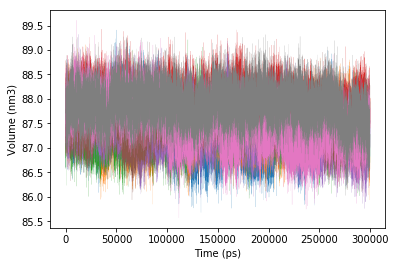

In [40]:
for i in range(183,191):
    xdata = dataDict[i]['time']
    ydata = dataDict[i]['volume']
    plt.plot(xdata,ydata,linewidth=0.10)
    plt.xlabel('Time (ps)')
    plt.ylabel('Volume (nm3)')
 

In [26]:
xval = []
yval = []
yerror = []

for i in range(183,191):
    xval = np.append(xval, i)
    yval = np.append(yval, np.mean(dataDict[i]['volume']))
    yerror = np.append(yerror, np.std(dataDict[i]['volume']))
    
funcPar, covPar = curve_fit(func, xval, yval, sigma = yerror)

Text(0,0.5,'Volume (nm3)')

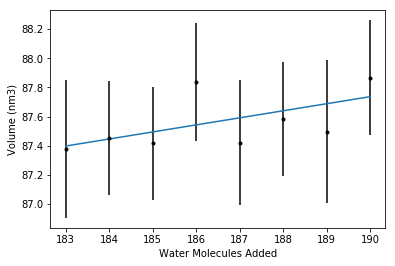

In [27]:
plt.errorbar(xval, yval,yerr=yerror,fmt='.k');
plt.plot(xval,func(xval, funcPar[0],funcPar[1]))
plt.xlabel('Water Molecules Added')
plt.ylabel('Volume (nm3)')

In [19]:
invFunc(trueV, funcPar[0],funcPar[1])

192.1684140969626

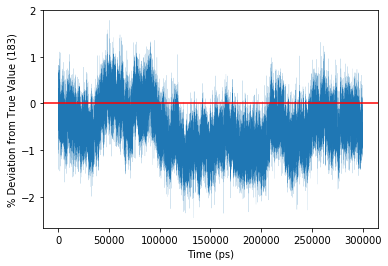

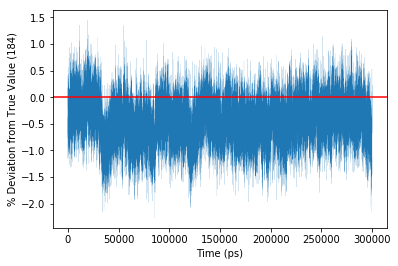

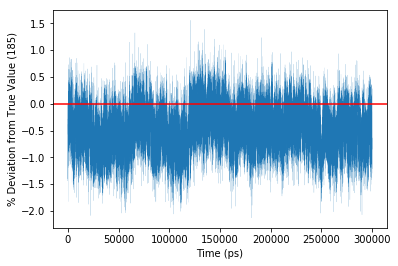

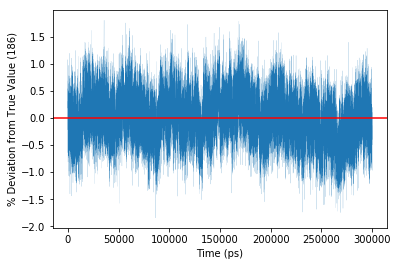

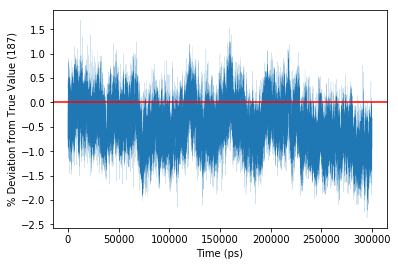

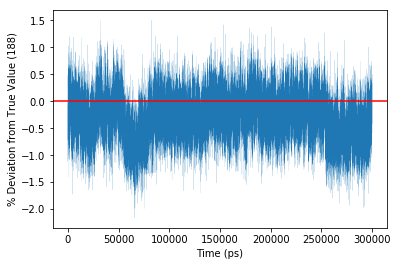

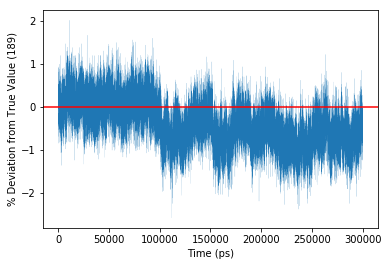

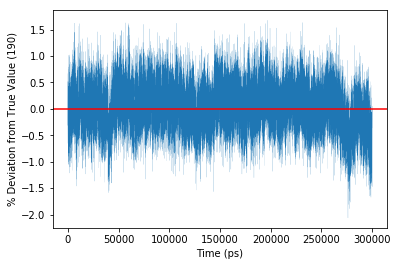

In [52]:
for i in range(183,191):
    xdata = dataDict[i]['time']
    ydata = dataDict[i]['volume']
    plt.plot(xdata,(ydata-trueV)*100/trueV,linewidth=0.10)
    plt.xlabel('Time (ps)')
    plt.ylabel('% Deviation from True Value '+'('+str(i)+')')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()


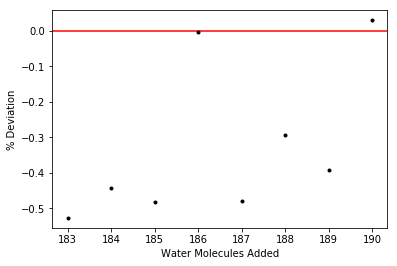

In [54]:
plt.errorbar(xval, (yval-trueV)*100/trueV,fmt='.k',);
plt.xlabel('Water Molecules Added')
plt.ylabel('% Deviation')
plt.axhline(y=0, color='r', linestyle='-')